## Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit

from math import sqrt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Retrieving the csv file

In [2]:
#loading the data
data = pd.read_csv('6 danny.csv',sep=';')

## Dataset Info
The dataset seems to contain a combination of energy-related measurements (generated energy and exported energy) along with weather-related variables (temperature, weather conditions). The data appears to be recorded over a period spanning 2015-2019. Each row represents measurements taken on a specific date. The dataset may be useful for analyzing the relationship between weather conditions and energy generation/export over time. Further analysis could involve exploring trends, correlations, and patterns within the data to gain insights into factors influencing energy generation and exportation.

In [3]:
#overview of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1280 non-null   object 
 1   Mes       1280 non-null   int64  
 2   Ano       1280 non-null   int64  
 3   Gen       1280 non-null   float64
 4   subGen    1280 non-null   float64
 5   mmGen     1280 non-null   float64
 6   Exp       1280 non-null   float64
 7   subExp    1280 non-null   float64
 8   mmExp     1280 non-null   float64
 9   PP        1280 non-null   float64
 10  Cond      1280 non-null   object 
 11  Temp min  1280 non-null   int64  
 12  Temp max  1280 non-null   int64  
 13  Temp med  1280 non-null   float64
 14  exp/gen   1280 non-null   float64
dtypes: float64(9), int64(4), object(2)
memory usage: 150.1+ KB


In [4]:
# printing first five rows of dataset
data.head()

Date  Mes   Ano     Gen  subGen    mmGen     Exp  subExp    mmExp  \
0  01/07/2015    7  2015  20.373  -0.514  20.1160  14.343  -0.857  13.9145   
1  02/07/2015    7  2015  19.859  -0.514  22.6195  13.486   5.237  16.1045   
2  03/07/2015    7  2015  25.380   5.521  20.2280  18.723  -8.199  14.6235   
3  04/07/2015    7  2015  15.076 -10.304  16.6745  10.524   2.683  11.8655   
4  05/07/2015    7  2015  18.273   3.197  21.5805  13.207   4.351  15.3825   

      PP           Cond  Temp min  Temp max  Temp med   exp/gen  
0  3.876           Fine        12        21      16.5  0.704020  
1  4.212           Fine        10        19      14.5  0.679088  
2  3.828           Fine         6        19      12.5  0.737707  
3  4.260  Partly Cloudy        11        19      15.0  0.698063  
4  4.464           Fine         9        22      15.5  0.722760

In [5]:
#statistical analysis of data
data.describe()

Mes          Ano          Gen       subGen        mmGen  \
count  1280.000000  1280.000000  1280.000000  1280.000000  1280.000000   
mean      6.408594  2017.007812    21.841244     0.019780    21.814320   
std       3.492794     1.249213     6.618402     7.272447     5.571707   
min       1.000000  2015.000000     0.051000   -23.464000     3.350500   
25%       3.000000  2016.000000    18.267500    -3.478000    18.252500   
50%       6.000000  2017.000000    23.291000    -0.091000    22.641250   
75%       9.000000  2018.000000    26.887750     3.459000    26.121125   
max      12.000000  2019.000000    31.889000    27.246000    31.620000   

               Exp       subExp        mmExp           PP     Temp min  \
count  1280.000000  1280.000000  1280.000000  1280.000000  1280.000000   
mean     17.292781    -0.048539    17.267730     4.066078    17.176562   
std       6.936380     7.097279     5.975617     0.700135     4.654447   
min       0.010000   -23.072000     0.567000     0.120000     3.000000   
25%      13.020250    -4.005750    13.239250     3.840000    14.000000   
50%      18.387500    -0.104000    17.587500     4.188000    18.000000   
75%      22.574000     3.742500    21.329750     4.500000    21.000000   
max      30.538000    24.024000    30.378500     5.004000    28.000000   

          Temp max     Temp med      exp/gen  
count  1280.000000  1280.000000  1280.000000  
mean     25.373438    21.275000     0.765462  
std       3.701900     3.935385     0.191771  
min      16.000000    11.000000     0.005659  
25%      22.000000    18.000000     0.676440  
50%      26.000000    21.500000     0.771867  
75%      28.000000    24.500000     0.975793  
max      51.000000    31.000000     1.000000

### Plot 1 - Yearly distribution of exported energy
The plot illustrates the yearly distribution of exported energy over the available years in the dataset.
The x-axis represents the years ('Ano') in the dataset.
The y-axis represents the average exported energy ('Exp') for each year.
By visualizing this data, it becomes easier to identify any trends, patterns, or fluctuations in the exported energy over time.

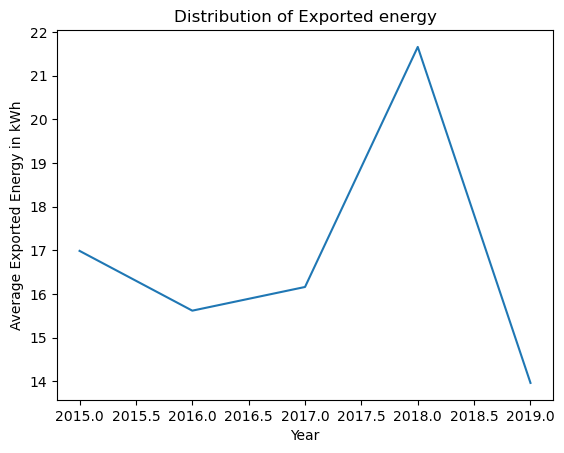

In [6]:
#Yearly distribution of exported energy
gen_data=data.groupby('Ano').mean()['Exp']
gen_data.plot(kind='line')
plt.title('Distribution of Exported energy')
plt.xlabel('Year')  
plt.ylabel('Average Exported Energy in kWh')
plt.show()

### Plot 2 - Monthly distribution of generated energy
The plot illustrates the distribution of generated energy across the months. The x-axis represents the months of the year. The y-axis represents the average generated energy for each month. By visualizing this data, it becomes easier to observe any seasonal trends or variations in the generation of energy throughout the year. Peaks or troughs in the plot may indicate months with higher or lower levels of generated energy, respectively.

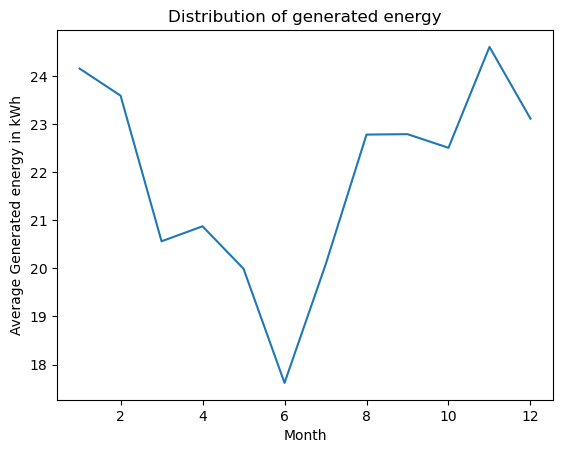

In [7]:
#monthly distribution of generated energy
gen_data=data.groupby('Mes').mean()['Gen']
gen_data.plot(kind='line')
plt.title('Distribution of generated energy')
plt.xlabel('Month')
plt.ylabel('Average Generated energy in kWh')
plt.show()

### Plot 3 - Monthly distribution of exported energy
The plot illustrates the distribution of exported energy across the months. The x-axis likely represents the months of the year. The y-axis represents the average exported energy for each month. By visualizing this data, it becomes easier to observe any seasonal trends or variations in the exportation of energy throughout the year. Peaks or troughs in the plot may indicate months with higher or lower levels of exported energy, respectively.

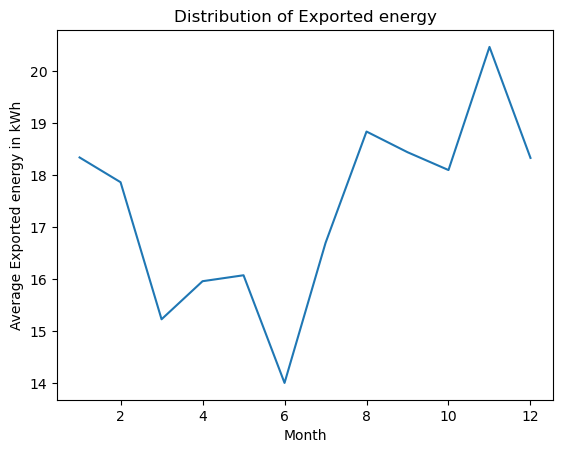

In [8]:
#monthly distribution of Exported energy
gen_data=data.groupby('Mes').mean()['Exp']
gen_data.plot(kind='line')
plt.title('Distribution of Exported energy')
plt.xlabel('Month')
plt.ylabel('Average Exported energy in kWh')
plt.show()

### Plot 4 - Yearly distribution of generated energy
The plot illustrates the distribution of generated energy across the years. The x-axis likely represents the years. The y-axis represents the average generated energy for each year. By visualizing this data, it becomes easier to observe any long-term trends or variations in the generation of energy over the years. Peaks or troughs in the plot may indicate years with higher or lower levels of generated energy, respectively.

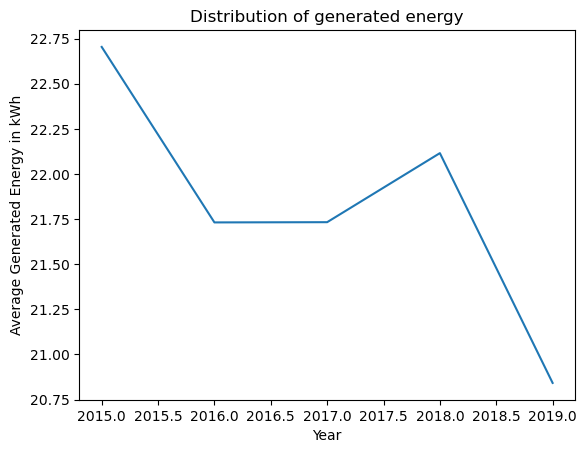

In [9]:
#Yearly distribution of generated energy
gen_data=data.groupby('Ano').mean()['Gen']
gen_data.plot(kind='line')
plt.title('Distribution of generated energy')
plt.xlabel('Year')
plt.ylabel('Average Generated Energy in kWh')
plt.show()

### Plot 5 - Count plot for weather condition
The plot illustrates the distribution of different weather conditions recorded in the dataset. Each bar represents the count of occurrences of a particular weather condition. The x-axis likely represents the different weather conditions. The y-axis represents the count of occurrences. By visualizing this data, it becomes easier to understand the frequency of each weather condition and identify any predominant weather patterns within the dataset.

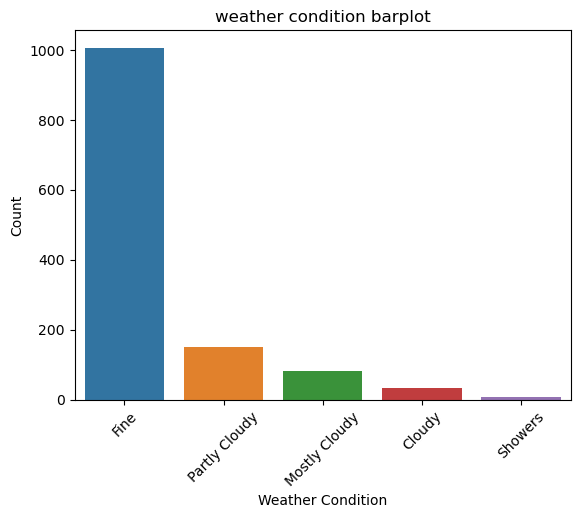

In [10]:
sns.countplot(x='Cond',data=data)
plt.title('weather condition barplot')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Plot 6 - Distribution of generated energy
The plot illustrates the distribution of generated energy through a box plot. The box plot provides information about the central tendency, dispersion, and skewness of the data. The box represents the interquartile range (IQR), with the median depicted by the line inside the box. The "whiskers" extending from the box show the range of the data, excluding outliers. Any points outside of the whiskers are considered outliers and are plotted individually. By visualizing this data, it becomes easier to identify any potential outliers, the range of values, and the overall distribution of generated energy within the dataset.

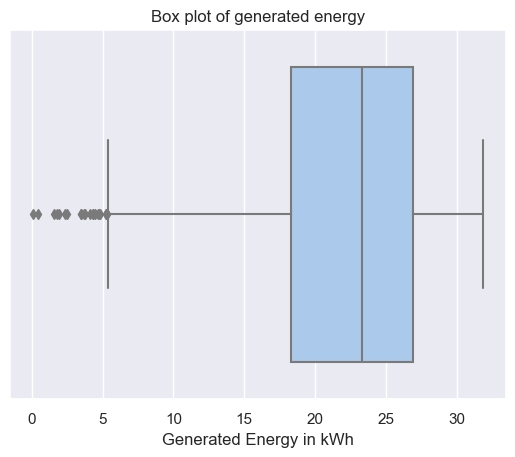

In [11]:
sns.set_theme( palette="pastel")
sns.boxplot(x=data['Gen'])
plt.title('Box plot of generated energy')
plt.xlabel('Generated Energy in kWh')
plt.show()

### Plot 7 - Distribution of Exported energy
The plot illustrates the distribution of exported energy through a box plot. Similar to the box plot for generated energy, this plot provides information about the central tendency, dispersion, and skewness of the exported energy data. The box represents the interquartile range (IQR), with the median depicted by the line inside the box. The "whiskers" extending from the box show the range of the data, excluding outliers. Any points outside of the whiskers are considered outliers and are plotted individually. By visualizing this data, it becomes easier to identify any potential outliers, the range of values, and the overall distribution of exported energy within the dataset.

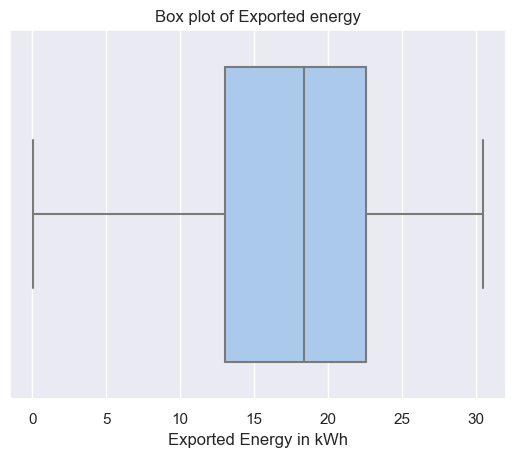

In [12]:
sns.set_theme( palette="pastel")
sns.boxplot(x=data['Exp'])
plt.title('Box plot of Exported energy')
plt.xlabel('Exported Energy in kWh')
plt.show()

### Plot 8 - Distribution of Peak Power
The plot illustrates the distribution of Peak Power (PP) through a box plot. This type of plot provides information about the central tendency, dispersion, and skewness of the Peak Power data. The box represents the interquartile range (IQR), with the median depicted by the line inside the box. The "whiskers" extending from the box show the range of the data, excluding outliers. Any points outside of the whiskers are considered outliers and are plotted individually. By visualizing this data, it becomes easier to identify any potential outliers, the range of values, and the overall distribution of Peak Power within the dataset.

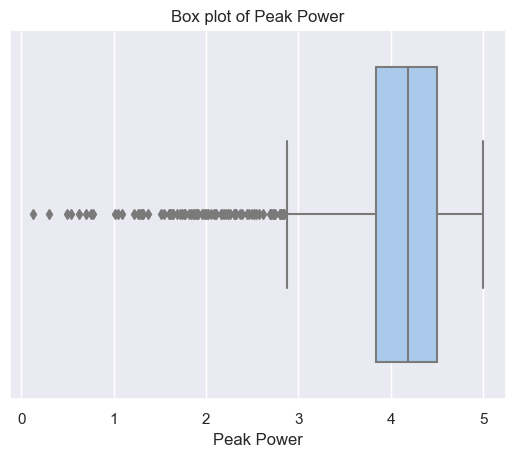

In [13]:
#distribution of Peak Power
sns.set_theme(palette="pastel")
sns.boxplot(x=data['PP'])
plt.title('Box plot of Peak Power')
plt.xlabel('Peak Power')
plt.show()

### Plot 9 - Scatter plot for association between generated and exported energy
The scatter plot visualizes the relationship between generated energy ('Gen') and exported energy ('Exp'). Each point on the plot represents a specific observation in the dataset, where the x-coordinate represents the generated energy and the y-coordinate represents the exported energy. Points are colored based on the corresponding weather condition at the time of observation ('Cond'). This plot allows for the examination of how generated and exported energy levels vary with each other, as well as how they are influenced by different weather conditions. Patterns or clusters of points may indicate associations between generated and exported energy levels under specific weather conditions. By visualizing this data, it becomes easier to understand the relationships between these variables and how they are influenced by external factors such as weather conditions.

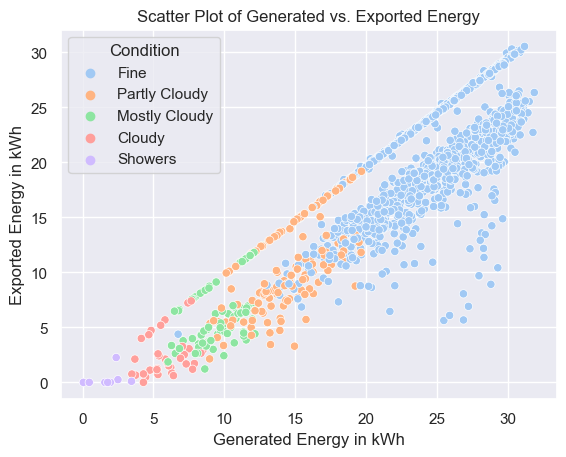

In [14]:
sns.scatterplot(data=data,x='Gen',y='Exp',hue='Cond')
plt.title('Scatter Plot of Generated vs. Exported Energy')
plt.xlabel('Generated Energy in kWh')  
plt.ylabel('Exported Energy in kWh')   
plt.legend(title='Condition') 
plt.show()

### Plot 10 - Line plot using weather conditions
The line plot illustrates the variation of Peak Power ('PP') with respect to years ('Ano'). Each line represents a different weather condition ('Cond'). The x-axis represents the years, and the y-axis represents the Peak Power. By visualizing this data, it becomes easier to observe how Peak Power varies over the years and how different weather conditions might influence this variation. This plot allows for the comparison of Peak Power trends across different weather conditions over time.

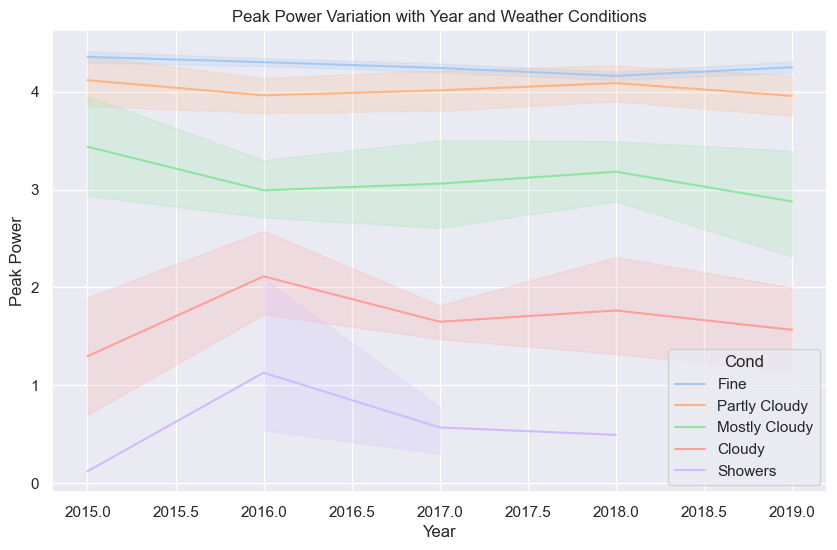

In [15]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting line plot with hue encoding weather conditions
sns.lineplot(data=data, x='Ano', y='PP', hue='Cond')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Peak Power')
plt.title('Peak Power Variation with Year and Weather Conditions')

# Display the plot
plt.show()

The ratio of generated vs exported is high for Fine weather condition and it is poor for showers weather condition

### Plot 11 - Relation with peakpower to the temperature
The scatter plot illustrates the relationship between the minimum temperature and Peak Power. The regression line provides an approximation of the linear relationship between the minimum temperature and Peak Power. By visualizing this data and examining the regression line, it becomes easier to understand the nature and strength of the relationship between minimum temperature and Peak Power.

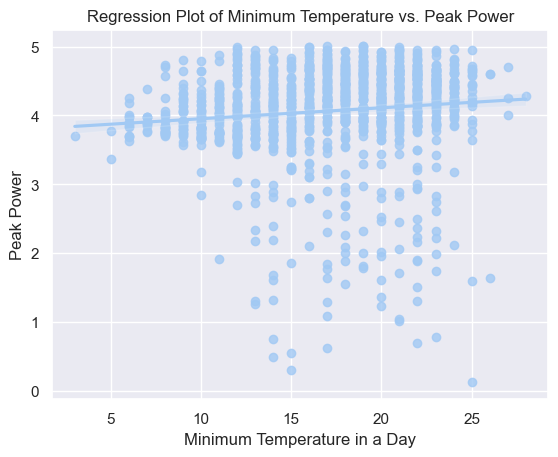

In [16]:
#relation with peakpower to the temperature
sns.regplot(x = "Temp min",
            y = "PP",
            data = data)
plt.title('Regression Plot of Minimum Temperature vs. Peak Power')
plt.xlabel('Minimum Temperature in a Day')
plt.ylabel('Peak Power')
plt.show()

There is a positive correlation between peakpower and temperature minimum There are high amount of outliers in the data

Examining correlation

### Correlation Matrix
The heatmap provides a visual representation of the correlation matrix, where each cell color indicates the strength and direction of the correlation between two variables. The diagonal line of the heatmap shows perfect correlation (correlation coefficient of 1) between each variable and itself. By visualizing this data, it becomes easier to identify variables that are strongly correlated, which can help in understanding the relationships and dependencies within the dataset.

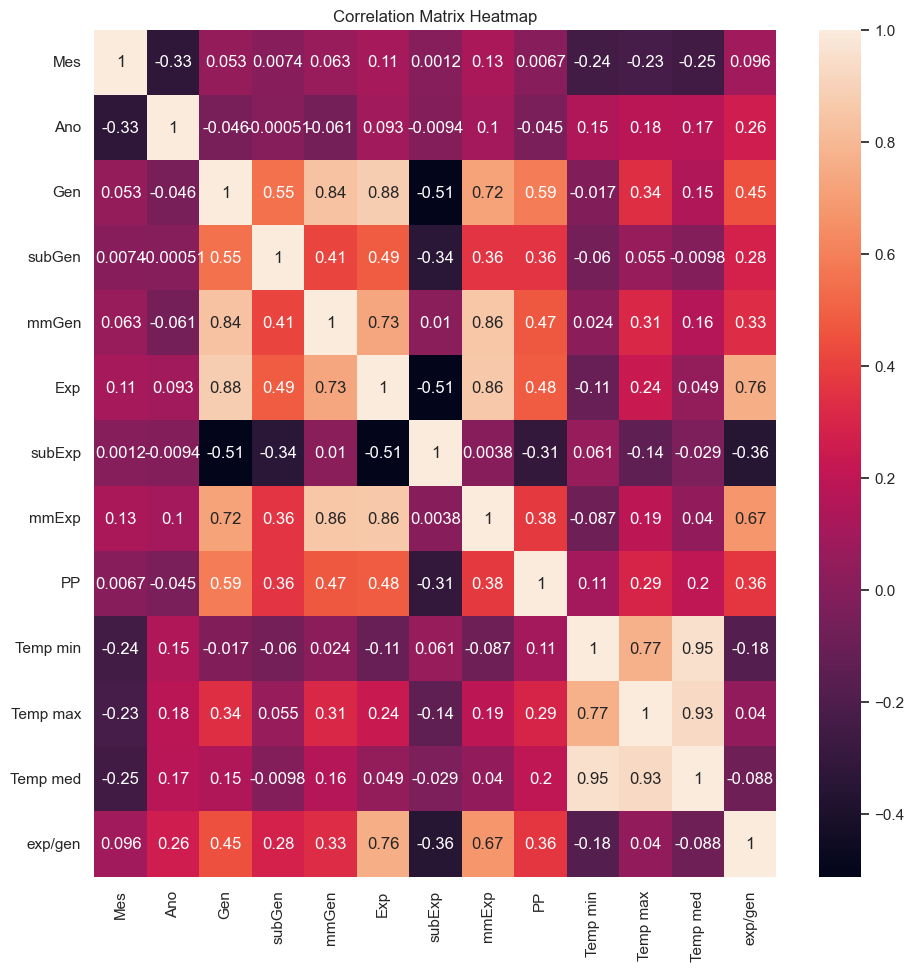

In [17]:
#correlation matrix
data_corr = data.corr()
plt.figure(figsize=(11, 11))
sns.heatmap(data_corr,annot=True)
plt.title('Correlation Matrix Heatmap') 
plt.show()

The following code represents a systematic approach to identify strongly correlated pairs of features within a dataset. Beginning with the definition of a threshold value, set here as 0.8 to denote strong correlation, the code proceeds to iteratively examine each pair of features in the correlation matrix (data_corr). If the relationship between a pair of features is stronger than our threshold, we keep track of it. Finally, we print out these pairs of features along with how strong their relationship is. This helps us understand which features might be affecting each other a lot in our data. It's useful for tasks like picking out important features or figuring out if some features are too similar to each other.

In [18]:
# Set the threshold for strong correlation
threshold = 0.8

# Find strongly correlated pairs
strong_corr_pairs = []
for i in range(len(data_corr.columns)):
    for j in range(i+1, len(data_corr.columns)):
        if abs(data_corr.iloc[i, j]) > threshold:
            strong_corr_pairs.append((data_corr.columns[i], data_corr.columns[j], data_corr.iloc[i, j]))

# Print the strongly correlated pairs
for pair in strong_corr_pairs:
    print(f"{pair[0]} - {pair[1]} : {pair[2]}")

Gen - mmGen : 0.8365228386999326
Gen - Exp : 0.8806092034431497
mmGen - mmExp : 0.8555483263629033
Exp - mmExp : 0.8593831680011463
Temp min - Temp med : 0.954150238776579
Temp max - Temp med : 0.9264779188590769


## Data Cleaning

This following code removes the columns named 'Date', 'Ano', and 'Mes' from the dataset. It does this by using the drop() function, specifying the column names to be dropped within a list, and setting the axis parameter to 1 to indicate columns (0 would indicate rows). The inplace=True parameter ensures that the changes are applied directly to the original dataset without needing to assign the result to a new variable.

In [19]:
#dropping the unnecessary columns
data.drop(['Date','Ano','Mes'],axis=1,inplace=True)

This line of code checks for missing values in each column of the dataset and sums up the count of missing values for each column.

In [20]:
data.isnull().sum()

Gen         0
subGen      0
mmGen       0
Exp         0
subExp      0
mmExp       0
PP          0
Cond        0
Temp min    0
Temp max    0
Temp med    0
exp/gen     0
dtype: int64

## Data Encoding
This code snippet is for encoding categorical columns in the dataset. It utilizes the LabelEncoder from the preprocessing module. Specifically, it encodes the categorical column named 'Cond' which is weather condition. After encoding, the 'Cond' column will contain numerical values instead of categorical labels.

In [21]:
#encoding the categorical columns
le=preprocessing.LabelEncoder()
data['Cond'] = le.fit_transform(data['Cond'])

## Splitting the dataset
This code snippet is responsible for splitting the dataset into features and targets for two different purposes: one for generated energy and the other for exported energy. For generated energy prediction: X_train_gen, X_test_gen: These variables hold the training and testing features respectively for generated energy prediction. y_train_gen, y_test_gen: These variables hold the training and testing target values respectively for generated energy prediction. For exported energy prediction: X_train_exp, X_test_exp: These variables hold the training and testing features respectively for exported energy prediction. y_train_exp, y_test_exp: These variables hold the training and testing target values respectively for exported energy prediction. The train_test_split function from the sklearn.model_selection module is used to split the data into training and testing sets, with 80% of the data used for training and 20% for testing.

In [22]:
#seperating the features and targets
X_gen = data.drop('Gen',axis=1)  #generated energy features
y_gen = data['Gen']              #generated energy targets

X_exp = data.drop('Exp',axis=1)  #exported energy features
y_exp = data['Exp']              #exported energy targets


#splitting the data
X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(X_gen,y_gen,test_size=0.2)

X_train_exp, X_test_exp, y_train_exp, y_test_exp  = train_test_split(X_exp,y_exp,test_size=0.2)


## Ensemble Models

In this Python code snippet, a stacked ensemble model is being constructed using scikit-learn's StackingRegressor class. The ensemble comprises four base models: K-Nearest Neighbors (KNN) regressor, Support Vector Regressor (SVR), Random Forest regressor, and Linear Regression. These models are combined using stacking, a technique that aggregates predictions from multiple models to improve overall performance. During training, the predictions of the base models are used as features for a final meta-estimator, which in this case is a Lasso regression model. The cv parameter is set to 10, indicating that 10-fold cross-validation will be used to train the base models and the meta-estimator. Stacking helps to leverage the strengths of individual models while mitigating their weaknesses, potentially leading to better predictive performance compared to any single model alone.

In [23]:
base_models = [
    ('KNN', KNeighborsRegressor()),
    ('SVR',SVR()),
    ('Random Forest',RandomForestRegressor()),
    ('Linear Regression',LinearRegression())
    ]
stacked = StackingRegressor(
    estimators = base_models,
    final_estimator = Lasso(),
    cv = 10)

## For generated energy

This following code iterates over a list of base machine learning models, fitting each model to the training data for generated energy prediction and evaluating its performance on the test data. For each model, it calculates metrics such as the coefficient of determination (R^2), root mean squared error (RMSE), mean squared error (MSE), mean absolute error (MAE), and mean absolute percentage error (MAPE), printing these metrics for analysis. After evaluating individual models, it trains a stacked ensemble model on the same training data and evaluates its performance similarly. Finally, it generates a scatter plot comparing the actual generated energy values to the predicted values from the stacked ensemble, providing visual insight into the model's performance.

-------KNN-------
Coefficient of determination: 0.9246426192980245
Root Mean Squared Error: 1.7918861524330305
Mean Squared Error: 3.2108559832812498
Mean Absolute Error: 1.2657054687499998
Mean Absolute Percentage Error: 0.07157882611817648
----------------------------------

-------SVR-------
Coefficient of determination: 0.9677990666733589
Root Mean Squared Error: 1.1713366867271653
Mean Squared Error: 1.3720296336729734
Mean Absolute Error: 0.8351930244658836
Mean Absolute Percentage Error: 0.04892311853974859
----------------------------------

-------Random Forest-------
Coefficient of determination: 0.9824369218514731
Root Mean Squared Error: 0.8650631908475679
Mean Squared Error: 0.7483343241593756
Mean Absolute Error: 0.5451763281249999
Mean Absolute Percentage Error: 0.03707877790602601
----------------------------------

-------Linear Regression-------
Coefficient of determination: 0.9772598517486858
Root Mean Squared Error: 0.9843377973189827
Mean Squared Error: 0.968920899

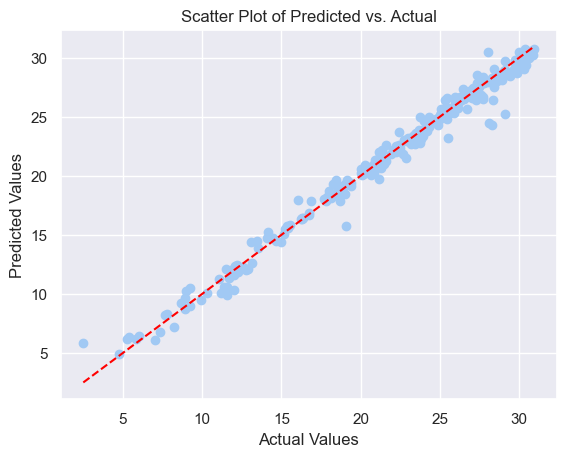

In [24]:
#generated energy
for name, model in base_models:
    model.fit(X_train_gen, y_train_gen)
    prediction = model.predict(X_test_gen)

    r2 = model.score(X_test_gen, y_test_gen)
    rmse = mean_squared_error(y_test_gen, prediction, squared = False)
    mse = mean_squared_error(y_test_gen, prediction)
    mae = mean_absolute_error(y_test_gen, prediction)
    mape = mean_absolute_percentage_error(y_test_gen, prediction)

    print("-------{}-------".format(name))
    print("Coefficient of determination: {}".format(r2))
    print("Root Mean Squared Error: {}".format(rmse))
    print("Mean Squared Error: {}".format(mse))
    print("Mean Absolute Error: {}".format(mae))
    print("Mean Absolute Percentage Error: {}".format(mape))
    print("----------------------------------\n")

stacked.fit(X_train_gen, y_train_gen)
stacked_prediction = stacked.predict(X_test_gen)
stacked_r2 = stacked.score(X_test_gen, y_test_gen)
stacked_rmse = mean_squared_error(y_test_gen, stacked_prediction, squared = False)
stacked_mse = mean_squared_error(y_test_gen, stacked_prediction)
stacked_mae = mean_absolute_error(y_test_gen, stacked_prediction)
stacked_mape = mean_absolute_percentage_error(y_test_gen, stacked_prediction)

print("-------Stacked Ensemble-------")
print("Coefficient of determination: {}".format(stacked_r2))
print("Root Mean Squared Error: {}".format(stacked_rmse))
print("Mean Squared Error: {}".format(stacked_mse))
print("Mean Absolute Error: {}".format(stacked_mae))
print("Mean Absolute Percentage Error: {}".format(stacked_mape))

print("----------------------------------")


# Create a scatter plot
plt.scatter(y_test_gen, stacked_prediction)

# Set plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual')

# Add a diagonal line for reference
plt.plot([min(y_test_gen), max(y_test_gen)], [min(y_test_gen), max(y_test_gen)], color='red', linestyle='--')

# Display the plot
plt.show()

## For exported energy

This code iterates over a list of base machine learning models, fitting each model to the training data for exported energy prediction and evaluating its performance on the test data. For each model, it calculates metrics such as the coefficient of determination (R^2), root mean squared error (RMSE), mean squared error (MSE), mean absolute error (MAE), and mean absolute percentage error (MAPE), printing these metrics for analysis. After evaluating individual models, it trains a stacked ensemble model on the same training data and evaluates its performance similarly. Finally, it generates a scatter plot comparing the actual generated energy values to the predicted values from the stacked ensemble, providing visual insight into the model's performance.

-------KNN-------
Coefficient of determination: 0.9624790973766195
Root Mean Squared Error: 1.3720040300369019
Mean Squared Error: 1.8823950584375
Mean Absolute Error: 1.00266875
Mean Absolute Percentage Error: 1.7008344197462466
----------------------------------

-------SVR-------
Coefficient of determination: 0.9925401965765044
Root Mean Squared Error: 0.6117619196863404
Mean Squared Error: 0.3742526463783164
Mean Absolute Error: 0.35781975772618546
Mean Absolute Percentage Error: 2.5458480356732425
----------------------------------

-------Random Forest-------
Coefficient of determination: 0.9967470187697057
Root Mean Squared Error: 0.40397968574681314
Mean Squared Error: 0.16319958649609392
Mean Absolute Error: 0.22762828124999968
Mean Absolute Percentage Error: 0.07827916698557572
----------------------------------

-------Linear Regression-------
Coefficient of determination: 0.9999221385408894
Root Mean Squared Error: 0.06250000000000051
Mean Squared Error: 0.00390625000000006

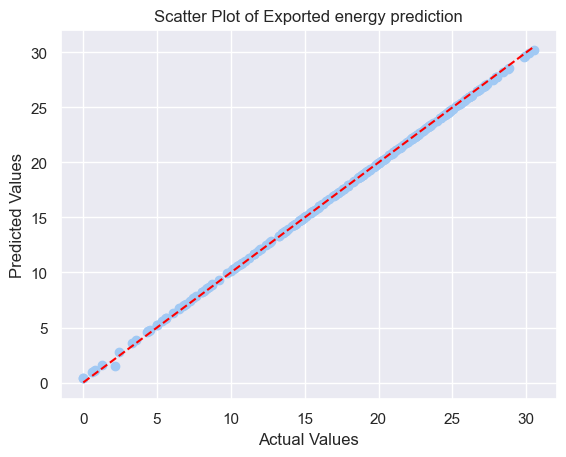

In [25]:

#exported energy
for name, model in base_models:
    model.fit(X_train_exp, y_train_exp)
    prediction = model.predict(X_test_exp)

    r2 = model.score(X_test_exp, y_test_exp)
    rmse = mean_squared_error(y_test_exp, prediction, squared = False)
    mse = mean_squared_error(y_test_exp, prediction)
    mae = mean_absolute_error(y_test_exp, prediction)
    mape = mean_absolute_percentage_error(y_test_exp, prediction)

    print("-------{}-------".format(name))
    print("Coefficient of determination: {}".format(r2))
    print("Root Mean Squared Error: {}".format(rmse))
    print("Mean Squared Error: {}".format(mse))
    print("Mean Absolute Error: {}".format(mae))
    print("Mean Absolute Percentage Error: {}".format(mape))
    print("----------------------------------\n")

stacked.fit(X_train_exp, y_train_exp)
stacked_prediction = stacked.predict(X_test_exp)
stacked_r2 = stacked.score(X_test_exp, y_test_exp)
stacked_rmse = mean_squared_error(y_test_exp, stacked_prediction, squared = False)
stacked_mse = mean_squared_error(y_test_exp, stacked_prediction)
stacked_mae = mean_absolute_error(y_test_exp, stacked_prediction)
stacked_mape = mean_absolute_percentage_error(y_test_exp, stacked_prediction)

print("-------Stacked Ensemble-------")
print("Coefficient of determination: {}".format(stacked_r2))
print("Root Mean Squared Error: {}".format(stacked_rmse))
print("Mean Squared Error: {}".format(stacked_mse))
print("Mean Absolute Error: {}".format(stacked_mae))
print("Mean Absolute Percentage Error: {}".format(stacked_mape))

print("----------------------------------")


# Create a scatter plot
plt.scatter(y_test_exp, stacked_prediction)

# Set plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Exported energy prediction')

# Add a diagonal line for reference
plt.plot([min(y_test_exp), max(y_test_exp)], [min(y_test_exp), max(y_test_exp)], color='red', linestyle='--')

# Display the plot
plt.show()

In [26]:
# Create the Bagging Regressor with RandomForestRegressor as base estimator
bagging_reg = BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=10, random_state=0)

# Fit the model
bagging_reg.fit(X_train_gen, y_train_gen)

# Predict
bagregressor_pred = bagging_reg.predict(X_test_gen)

In [27]:
r2 = bagging_reg.score(X_test_gen, y_test_gen)
rmse = mean_squared_error(y_test_gen, bagregressor_pred, squared = False)
mse = mean_squared_error(y_test_gen, bagregressor_pred)
mae = mean_absolute_error(y_test_gen, bagregressor_pred)
mape = mean_absolute_percentage_error(y_test_gen, bagregressor_pred)

print("-------Stacked Ensemble-------")
print("Coefficient of determination: {}".format(r2))
print("Root Mean Squared Error: {}".format(rmse))
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Mean Absolute Percentage Error: {}".format(mape))

print("----------------------------------")


-------Stacked Ensemble-------
Coefficient of determination: 0.9801916334502059
Root Mean Squared Error: 0.918696047488789
Mean Squared Error: 0.8440024276715232
Mean Absolute Error: 0.6016379765625002
Mean Absolute Percentage Error: 0.03968128337049339
----------------------------------


In [28]:
# Create the Bagging Regressor with RandomForestRegressor as base estimator
bagging_reg = BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=10, random_state=0)

# Fit the model
bagging_reg.fit(X_train_exp, y_train_exp)

# Predict
bagregressor_pred = bagging_reg.predict(X_test_exp)

In [29]:
r2 = bagging_reg.score(X_test_exp, y_test_exp)
rmse = mean_squared_error(y_test_exp, bagregressor_pred, squared = False)
mse = mean_squared_error(y_test_exp, bagregressor_pred)
mae = mean_absolute_error(y_test_exp, bagregressor_pred)
mape = mean_absolute_percentage_error(y_test_exp, bagregressor_pred)

In [30]:
print("-------Bagging regressor-------")
print("Coefficient of determination: {}".format(r2))
print("Root Mean Squared Error: {}".format(rmse))
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Mean Absolute Percentage Error: {}".format(mape))

print("----------------------------------")

-------Bagging regressor-------
Coefficient of determination: 0.9962498486874672
Root Mean Squared Error: 0.4337536515250567
Mean Squared Error: 0.1881422302113203
Mean Absolute Error: 0.24702677343750015
Mean Absolute Percentage Error: 0.31077783842794104
----------------------------------


## Boosting Regressor

In [31]:
#gradient boosting regressor for generated energy
grad_reg = GradientBoostingRegressor(random_state=0)
grad_reg.fit(X_train_gen, y_train_gen)

#preditions
grad_pred =  grad_reg.predict(X_test_gen)

In [32]:
r2 = grad_reg.score(X_test_gen, y_test_gen)
rmse = mean_squared_error(y_test_gen, grad_pred, squared = False)
mse = mean_squared_error(y_test_gen, grad_pred)
mae = mean_absolute_error(y_test_gen, grad_pred)
mape = mean_absolute_percentage_error(y_test_gen, grad_pred)

print("-------{}-------".format(name))
print("Coefficient of determination: {}".format(r2))
print("Root Mean Squared Error: {}".format(rmse))
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Mean Absolute Percentage Error: {}".format(mape))
print("----------------------------------\n")

-------Linear Regression-------
Coefficient of determination: 0.979926068204412
Root Mean Squared Error: 0.9248338947225324
Mean Squared Error: 0.8553177328276481
Mean Absolute Error: 0.6952678135790493
Mean Absolute Percentage Error: 0.043265299031196046
----------------------------------



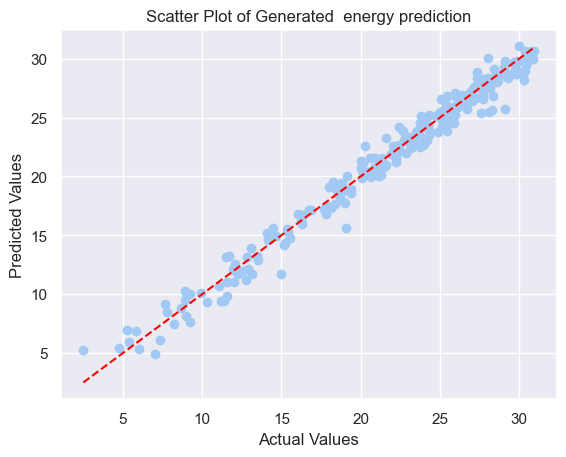

In [33]:
# Create a scatter plot
plt.scatter(y_test_gen, grad_pred)

# Set plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Generated  energy prediction')

# Add a diagonal line for reference
plt.plot([min(y_test_gen), max(y_test_gen)], [min(y_test_gen), max(y_test_gen)], color='red', linestyle='--')

# Display the plot
plt.show()

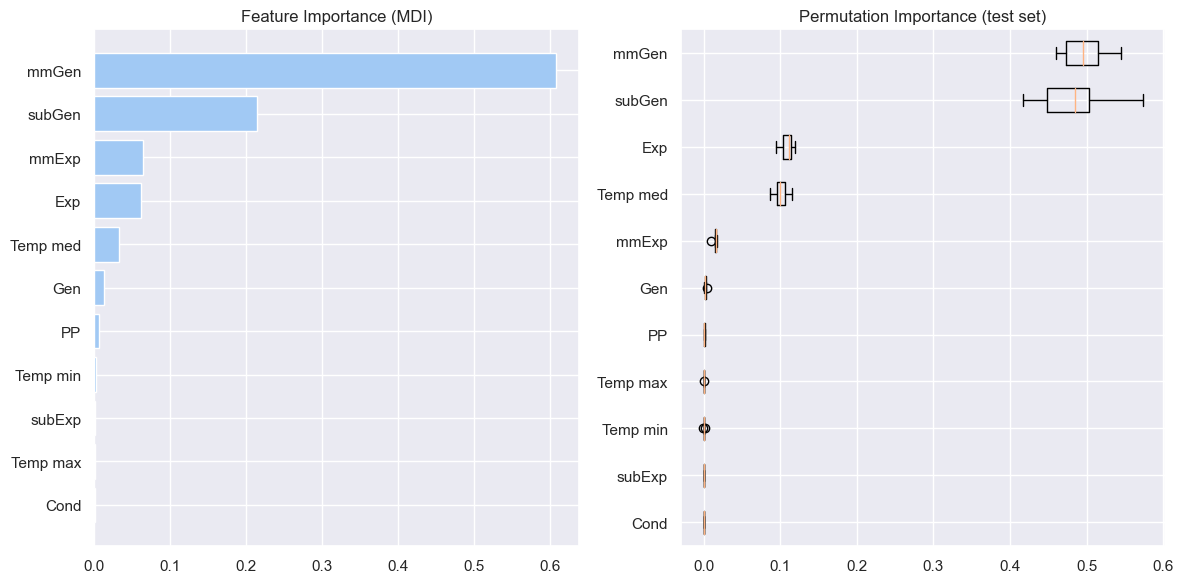

In [34]:
from sklearn.inspection import permutation_importance
feature_importance = grad_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(data.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    grad_reg, X_test_gen, y_test_gen, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(data.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

## Time series Validation

The code performs forward chaining cross-validation using TimeSeriesSplit with 5 splits on the given data, iterating over each fold. Within each iteration, it trains the model on the training data, makes predictions on the test data, calculates the mean squared error (MSE) between the predicted and actual values, and stores the MSE scores in a list. Finally, it computes the average MSE across all folds and prints the result.

The average mean squared error (MSE) of approximately 0.55 suggests that, on average, the squared differences between the predicted values and the actual values (in this case, the "Gen" variable) across all folds are around 0.55. Very Low MSE values indicate better performance of the model, implying that the model's predictions are closer to the actual values.

In [35]:

# Define features (X) and target variable (y)
X = data.drop(columns=['Gen'])  # Features
y = data['Gen']  # Target variable

# Define the number of splits for forward chaining
n_splits = 5

# Initialize TimeSeriesSplit with the number of splits
tscv = TimeSeriesSplit(n_splits=n_splits)

# Define lists to store evaluation metrics
mse_scores = []

# Perform forward chaining validation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train your model (replace with your model training code)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Compute average MSE across all folds
average_mse = np.mean(mse_scores)
print("Average Mean Squared Error (Forward Chaining):", average_mse)


Average Mean Squared Error (Forward Chaining): 1.232802354500843


Same performed for exported energy. A mean squared error (MSE) of approximately 0.012 indicates that the very low MSE values suggest better model performance, indicating that the model's predictions are closer to the actual values.

In [36]:

# Define features (X) and target variable (y)
X = data.drop(columns=['Exp'])  # Features
y = data['Exp']  # Target variable

# Define the number of splits for forward chaining
n_splits = 5

# Initialize TimeSeriesSplit with the number of splits
tscv = TimeSeriesSplit(n_splits=n_splits)

# Define lists to store evaluation metrics
mse_scores = []

# Perform forward chaining validation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train your model (replace with your model training code)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Compute average MSE across all folds
average_mse = np.mean(mse_scores)
print("Average Mean Squared Error (Forward Chaining):", average_mse)


Average Mean Squared Error (Forward Chaining): 0.000938967136150228


## Cross Validation

This code first performs a train-test split validation to evaluate the performance of a RandomForestRegressor model on predicting a target variable (y) based on features (X). It then conducts 5-fold cross-validation using KFold to assess the model's performance more robustly. For each fold in cross-validation, it trains the model, makes predictions on the test set, calculates mean squared error (MSE) and coefficient of determination (R^2) scores, and aggregates these scores. Finally, it computes the average MSE and R^2 across all folds and plots the residuals of the last fold.

Train-Test Split Validation:
Mean Squared Error: 0.2089573644320301
Coefficient of Determination (R^2): 0.9953784295126099

Cross-Validation:
Average Mean Squared Error: 0.14658077147789073
Average Coefficient of Determination (R^2): 0.9969343354789736



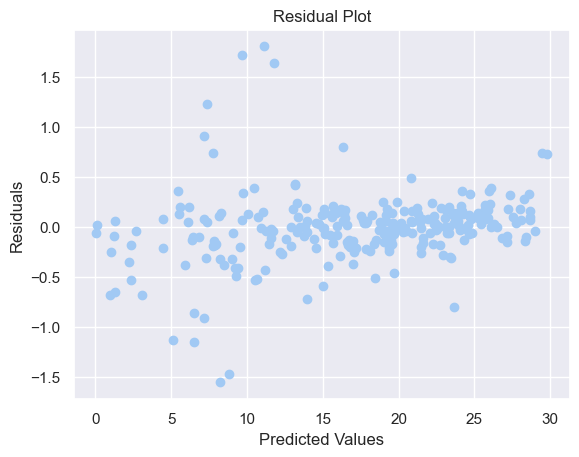

In [37]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Assuming X_train, X_test, y_train, y_test are available
# No need to convert X to numpy array if it's already in that format
# 1. Train-Test Split Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (Random Forest Regressor in this case)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Train-Test Split Validation:")
print("Mean Squared Error:", mse)
print("Coefficient of Determination (R^2):", r2)
print()

# 2. Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = []
r2_scores = []

# Convert X to DataFrame if it's not already
X = pd.DataFrame(X)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Use iloc for DataFrame indexing
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # Ensure y is a Series object

    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_scores.append(mse)
    r2_scores.append(r2)

avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)

print("Cross-Validation:")
print("Average Mean Squared Error:", avg_mse)
print("Average Coefficient of Determination (R^2):", avg_r2)
print()

residuals = y_test - y_pred

# Plotting residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
